In [ ]:
import pandas as pd
import string
from nltk.corpus import stopwords

In [ ]:
cd Downloads

/Users/kantha/Downloads


In [ ]:
df_spam = pd.read_csv('NB.csv', encoding = 'ISO-8859-1')

In [ ]:
def message_text_process(mess):
    no_punctuation = [char for char in mess if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [word for word in no_punctuation.split() if word.lower() 
            not in stopwords.words('english')]

In [ ]:
sentences = df_spam['text'].apply(message_text_process)

In [ ]:
sentences

0                            [Hope, good, week, checking]
1                                   [Kgive, back, thanks]
2                                        [also, cbe, pay]
3       [complimentary, 4, STAR, Ibiza, Holiday, å£100...
4       [okmail, Dear, Dave, final, notice, collect, 4...
                              ...                        
5554    [great, role, model, giving, much, really, wis...
5555    [Awesome, remember, last, time, got, somebody,...
5556    [dont, prize, go, another, customer, TC, wwwtc...
5557    [SMS, ac, JSco, Energy, high, u, may, know, 2c...
5558                            [Shall, call, dear, food]
Name: text, Length: 5559, dtype: object

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(sentences, min_count=10)

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [ ]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


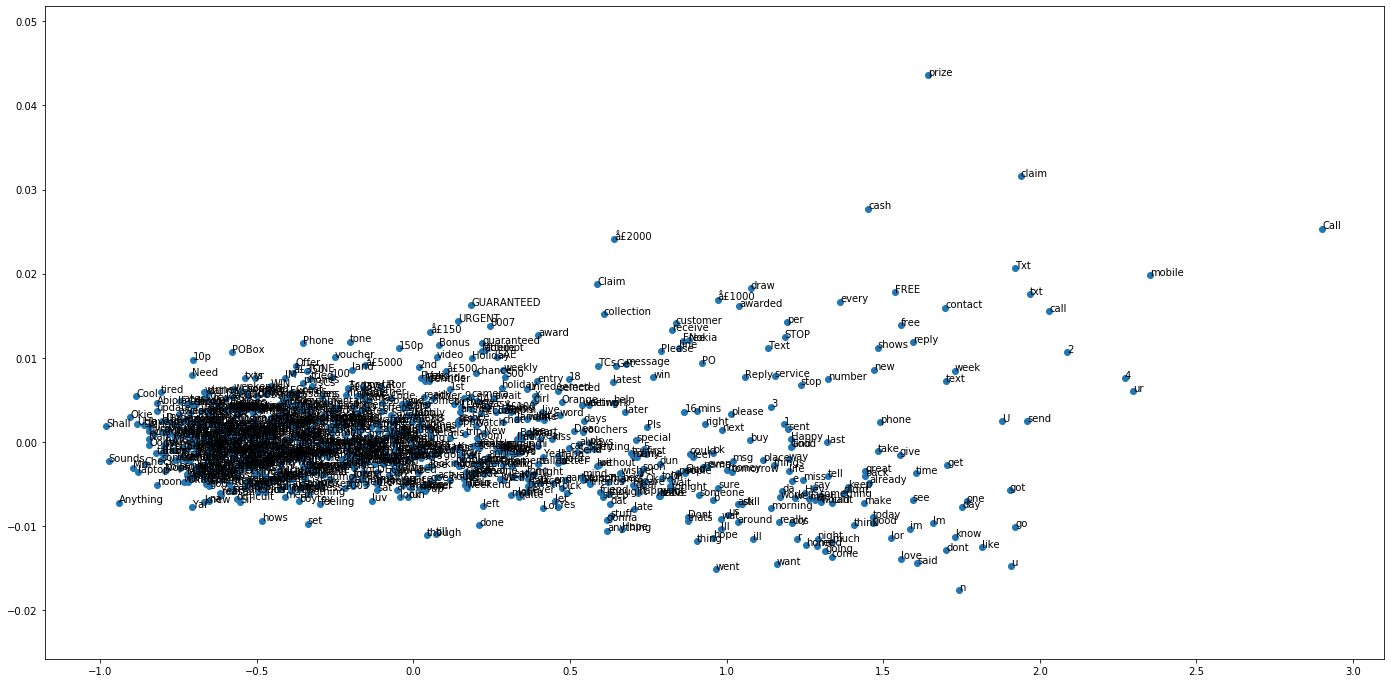

In [ ]:
pyplot.figure(figsize=(24,12))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()